## 数据prepare

In [1]:
import numpy as np


def create_data():
    """创建数据集"""
    features = np.array(
        [[2.88, 3.05], [3.1, 2.45], [3.05, 2.8], [2.9, 2.7], [2.75, 3.4],
         [3.23, 2.9], [3.2, 3.75], [3.5, 2.9], [3.65, 3.6], [3.35, 3.3]])
    labels = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
    return features, labels

In [2]:
features, labels = create_data()
print('features: \n', features)
print('labels: \n', labels)

features: 
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]
labels: 
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


## 数据可视化

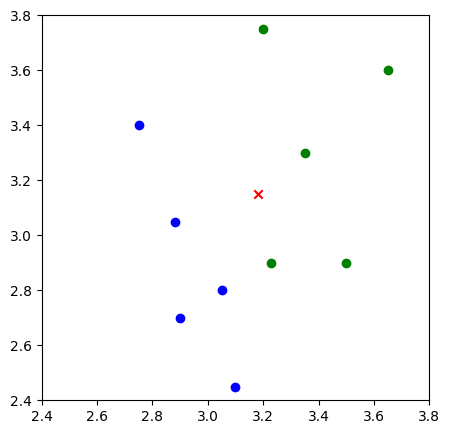

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

# 返回每个数据的x特征值
x_feature = list(map(lambda x: x[0], features))

# 返回每个数据的特征值
y_feature = list(map(lambda y: y[1], features))

# 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[:5], y_feature[:5], c="b")

# 在画布上绘画出"B"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")

# 待测试点的坐标为 [3.1，3.2]
plt.scatter([3.18], [3.15], c="r", marker="x")

## 曼哈顿距离
假设向量维度为n，计算公式为：
$$
d_{(x_i, x_j)} = \sum_{l=1}^n \lvert x_i^{l} - x_j^{l} \rvert
$$

In [4]:
def d_man(x, y):
    """计算曼哈顿距离"""
    d = np.sum(np.abs(x - y))
    return d

In [5]:
x = np.array([3.1, 3.2])  # 任意指定 2 点计算
print("x:", x)

y = np.array([2.5, 2.8])
print("y:", y)

print(d_man(x, y))

x: [3.1 3.2]
y: [2.5 2.8]
1.0000000000000004


## 欧式距离
$$
d_{(x_i, x_j)} = \sqrt{\sum_{l=1}^n ( x_i^{l} - x_j^{l} ) ^ 2}
$$

In [6]:
def d_euc(x, y):
    """计算欧式距离"""
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

In [7]:
x = np.random.random(10)  # 随机生成 10 个数的数组作为 x 特征的值
print("x:", x)

y = np.random.random(10)
print("y:", y)

distance_euc = d_euc(x, y)
print(distance_euc)


x: [0.88146943 0.43187552 0.2294835  0.22651972 0.52542019 0.39235387
 0.96409511 0.09513825 0.28805787 0.73581295]
y: [0.71551482 0.29947731 0.76632403 0.80164539 0.25540606 0.45882978
 0.84899429 0.95705579 0.52408374 0.47123111]
1.274058864240755


## 多数表决算法

In [8]:
def majority_voting(class_count):
    """多数表决算法"""
    sorted_class_count = sorted(
        class_count.items(), key=lambda x: x[1], reverse=True)
    return sorted_class_count

arr = {'A': 3, 'B': 2, "C": 6, "D": 5}
majority_voting(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

## KNN算法实现

In [9]:
def knn_classify(test_data, train_data, labels, k):
    """knn算法实现"""
    # 创建一个空的数组用于存放距离
    distances = np.array([])
    
    # 使用欧式距离计算数据相似度
    for each_data in train_data:
        d = d_euc(test_data, each_data)
        distances = np.append(distances, d)
    
    # 获取按距离从小到大排序后的索引
    sorted_distance_index = distances.argsort()
    sorted_distance = np.sort(distances)
    r = (sorted_distance[k] + sorted_distance[k-1]) / 2  # 计算
    
    # 多数表决
    class_count = {}
    for i in range(k):
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    final_label = majority_voting(class_count)
    
    return final_label, r

In [10]:
test_data = np.array([3.18, 3.15])
final_label, r = knn_classify(test_data, features, labels, 5)
final_label

[('B', 3), ('A', 2)]

## 结果展示

In [11]:
def circle(r, a, b):
    """画圆，这里采用极坐标的方式对圆进行表示 ：x=r*cosθ，y=r*sinθ"""
    theta = np.arange(0, 2*np.pi, 0.01)
    x = a+r * np.cos(theta)
    y = b+r * np.sin(theta)
    return x, y

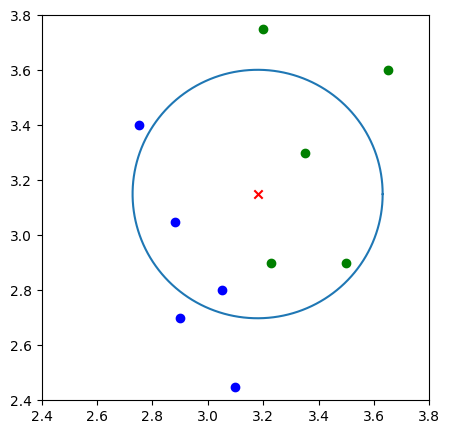

In [12]:
plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

# 返回每个数据的 x 特征值
x_feature = list(map(lambda x: x[0], features))
y_feature = list(map(lambda y: y[1], features))

# 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[:5], y_feature[:5], c="b")

# 在画布上绘画出"B"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")

# 待测试点的坐标为 [3.18，3.15]
plt.scatter([3.18], [3.15], c="r", marker="x")

k_circle_x, k_circle_y = circle(r, 3.18, 3.15)
plt.plot(k_circle_x, k_circle_y)